In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
#train.head()
train.dtypes

train_attr = train[['PassengerId','Survived','Sex','Age','SibSp','Parch','Fare','Embarked']]
train_attr.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,1,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,0,male,35.0,0,0,8.0500,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

test_attr = test[['PassengerId','Sex','Age','SibSp','Parch','Fare','Embarked']]
test_attr.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,male,34.5,0,0,7.8292,Q
1,893,female,47.0,1,0,7.0000,S
2,894,male,62.0,0,0,9.6875,Q
3,895,male,27.0,0,0,8.6625,S
4,896,female,22.0,1,1,12.2875,S


In [4]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


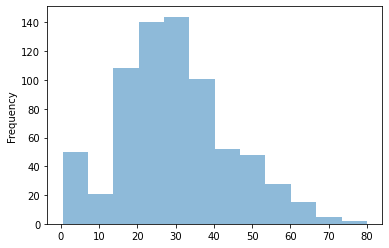

In [5]:
ax = train['Age'].plot.hist(bins=12, alpha=0.5)


In [6]:
train_attr_embarked = pd.get_dummies(train_attr.Embarked, prefix='Embarked')
train_attr_embarked.head()

#train_attr.loc[train_attr.Sex == 'male', 'Sex'] = 1
#train_attr.loc[train_attr.Sex == 'female', 'Sex'] = 0

train_attr.drop(columns=['Embarked'])
train_attr_final = pd.concat([train_attr, train_attr_embarked], axis=1, sort=False)
train_attr_final.head()
train_attr_final.drop(columns=['Embarked'])

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,male,22.0,1,0,7.2500,0,0,1
1,2,1,female,38.0,1,0,71.2833,1,0,0
2,3,1,female,26.0,0,0,7.9250,0,0,1
3,4,1,female,35.0,1,0,53.1000,0,0,1
4,5,0,male,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,male,27.0,0,0,13.0000,0,0,1
887,888,1,female,19.0,0,0,30.0000,0,0,1
888,889,0,female,NaN,1,2,23.4500,0,0,1
889,890,1,male,26.0,0,0,30.0000,1,0,0


In [7]:
train_attr_final.loc[train_attr.Sex == 'male', 'Sex1'] = 1
train_attr_final.loc[train_attr.Sex == 'female', 'Sex1'] = 0

#train_attr_final['Sex1'].astype(int)
train_attr_final['Sex1'] = train_attr_final['Sex1'].apply(np.int64)
#print(train_attr_final['Sex1'].isnull().sum())

train_attr_final.drop(columns=['Sex'])

train_attr_final.dtypes
train_attr_final.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex1
0,1,0,male,22.0,1,0,7.2500,S,0,0,1,1
1,2,1,female,38.0,1,0,71.2833,C,1,0,0,0
2,3,1,female,26.0,0,0,7.9250,S,0,0,1,0
3,4,1,female,35.0,1,0,53.1000,S,0,0,1,0
4,5,0,male,35.0,0,0,8.0500,S,0,0,1,1


In [8]:
train_attr_1 = train_attr_final.drop(columns=['Sex','Embarked'])
train_attr_1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex1
0,1,0,22.0,1,0,7.2500,0,0,1,1
1,2,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,1


In [9]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
train_attr_final_with_imputed_values = my_imputer.fit_transform(train_attr_1)
#train_attr_final_with_imputed_values.head(20)

df = pd.DataFrame(train_attr_final_with_imputed_values, columns = ['PassengerId','Survived','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S','Sex1'])
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex1
0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,1.0


In [10]:
test_attr = test[['PassengerId','Sex','Age','SibSp','Parch','Fare','Embarked']]
test_attr.head()

test_attr_embarked = pd.get_dummies(test_attr.Embarked, prefix='Embarked')
test_attr_embarked.head()

test_attr.drop(columns=['Embarked'])
test_attr_final = pd.concat([test_attr, test_attr_embarked], axis=1, sort=False)
test_attr_final.head()
test_attr_final.drop(columns=['Embarked'])

test_attr_final.loc[test_attr.Sex == 'male', 'Sex1'] = 1
test_attr_final.loc[test_attr.Sex == 'female', 'Sex1'] = 0

#train_attr_final['Sex1'].astype(int)
test_attr_final['Sex1'] = test_attr_final['Sex1'].apply(np.int64)
#print(train_attr_final['Sex1'].isnull().sum())

#test_attr_final.drop(columns=['Sex'])

#test_attr_final.dtypes
test_attr_final.head()

test_attr_1 = test_attr_final.drop(columns=['Sex','Embarked'])

from sklearn.impute import SimpleImputer
my_imputer1 = SimpleImputer()
test_attr_final_with_imputed_values = my_imputer1.fit_transform(test_attr_1)
test_attr_1.head()
#print(test_attr_final_with_imputed_values)
#train_attr_final_with_imputed_values.head(20)

dftest = pd.DataFrame(test_attr_final_with_imputed_values, columns = ['PassengerId','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S','Sex1'])
dftest.head()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex1
0,892.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0
1,893.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0
2,894.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0
3,895.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1.0
4,896.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0


In [11]:
#LogRegression
from sklearn.linear_model import LogisticRegression
X, y = df[['PassengerId','Sex1','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']],df['Survived']
X_test = dftest[['PassengerId','Sex1','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']]
#print(X)

clf = LogisticRegression(random_state=0,max_iter=1000).fit(X, y)
print(clf.predict(X_test))
clf.predict_proba(X)[:,1]
clf.score(X, y)

#X_toscale = df[['Age','SibSp','Fare']]
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_toscale = sc.fit_transform(X_toscale)
#X_old = df[['PassengerId','Sex1','Parch','Embarked_C','Embarked_Q','Embarked_S']].to_numpy() 
#X = np.concatenate((X_toscale,X_old),axis=1)
#X




#print(len(test))

#clf.predict()



[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

0.792368125701459

In [12]:
predictions = pd.DataFrame(
    clf.predict(X_test), columns=['Survived']
                           )
print(len(predictions))

predictions['PassengerId'] = dftest['PassengerId'].apply(np.int64)
predictions['Survived'] = predictions['Survived'].apply(np.int64)
predictions1 = predictions[['PassengerId','Survived']]
predictions1.to_csv("submission.csv", index=False)
predictions1.head(30)
#predictions['PassengerId'].isnull().sum()

418


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [13]:
#standardizing the input feature
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
X

,PassengerId,Sex1,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0
1,2.0,0.0,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,0.0,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,1.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887.0,1.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0
887,888.0,0.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0
888,889.0,0.0,29.699118,1.0,2.0,23.4500,0.0,0.0,1.0
889,890.0,1.0,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0


In [14]:
#Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

# create the classifier
classifierForest = RandomForestClassifier(n_estimators=1000,
                                          bootstrap = True,
                                          max_features = 'sqrt')

# Train the model using the training sets
classifierForest.fit(X, y)
y_pred = classifierForest.predict(X)
print(classifierForest.score(X, y))
print("Accuracy:", accuracy_score(y, y_pred))

y_pred = classifierForest.predict(X_test)
print(y_pred)

1.0
Accuracy: 1.0
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.

In [15]:
#SVM_standard_kernel
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clfSVM = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
clfSVM.fit(X, y)
print(clfSVM.score(X, y))
#print("Accuracy:", accuracy_score(y, y_pred))

y_pred = clfSVM.predict(X_test)

0.8338945005611672


In [16]:
predictions = pd.DataFrame(
    clfSVM.predict(X_test), columns=['Survived']
                           )
#print(len(predictions))

predictions['PassengerId'] = dftest['PassengerId'].apply(np.int64)
predictions['Survived'] = predictions['Survived'].apply(np.int64)
predictions1 = predictions[['PassengerId','Survived']]
predictions1.to_csv("submission_svm.csv", index=False)
predictions1['Survived'].sum()

139

In [17]:
#GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
#X, y = make_classification(random_state=0)
clfGrad = make_pipeline(StandardScaler(), GradientBoostingClassifier(learning_rate=0.1,
                                                                     min_samples_leaf=10,max_depth=10,max_features='sqrt',
                                                                     subsample=0.8,random_state=10))
clfGrad.fit(X, y)

print(clfGrad.score(X, y))
X

0.9809203142536476


,PassengerId,Sex1,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0
1,2.0,0.0,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,0.0,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,1.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887.0,1.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0
887,888.0,0.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0
888,889.0,0.0,29.699118,1.0,2.0,23.4500,0.0,0.0,1.0
889,890.0,1.0,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0


In [18]:
predictions = pd.DataFrame(
    clfGrad.predict(X_test), columns=['Survived']
                           )
#print(len(predictions))

predictions['PassengerId'] = dftest['PassengerId'].apply(np.int64)
predictions['Survived'] = predictions['Survived'].apply(np.int64)
predictions1 = predictions[['PassengerId','Survived']]
predictions1.to_csv("submission_grad.csv", index=False)
predictions1['Survived'].sum()

117

In [19]:
#Grid_GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV   #Perforing grid search
param_test3 = {'min_samples_split':range(50,150,100), 'min_samples_leaf':range(10,50,30)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=10,max_features='sqrt', random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=10)
gsearch3.fit(X, y)
#print(gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_)
print(gsearch3.score(X, y))
X

0.9425137677222808


,PassengerId,Sex1,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0
1,2.0,0.0,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,0.0,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,1.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887.0,1.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0
887,888.0,0.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0
888,889.0,0.0,29.699118,1.0,2.0,23.4500,0.0,0.0,1.0
889,890.0,1.0,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0


In [20]:
predictions = pd.DataFrame(
    gsearch3.predict(X_test), columns=['Survived']
                           )
#print(len(predictions))

predictions['PassengerId'] = dftest['PassengerId'].apply(np.int64)
predictions['Survived'] = predictions['Survived'].apply(np.int64)
predictions1 = predictions[['PassengerId','Survived']]
predictions1.to_csv("submission_grad.csv", index=False)
predictions1['Survived'].sum()

143